In [2]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
csv = pd.read_csv("dataset/Sensor_data_Normal.csv", parse_dates=True, index_col='Timestamp')

## Preprocess training data

In [4]:
# Remove data collected on 22/12/2015
normal_csv = csv.drop(csv.head(28800).index, inplace=False)
normal_csv

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-23 00:00:00,0.000000,813.3956,1,2,1,262.3045,8.402845,440.0667,1.913562,2,...,2,1,254.0855,1.025214,193.2197,0.000000,1,1,1,Normal
2015-12-23 00:00:01,0.000000,813.0424,1,2,1,262.3045,8.402845,440.2974,2.148848,2,...,2,1,254.0214,1.025214,193.2197,0.000000,1,1,1,Normal
2015-12-23 00:00:02,0.000000,813.0424,1,2,1,262.3045,8.402845,440.8357,2.280844,2,...,2,1,253.8612,1.025214,193.2037,0.000000,1,1,1,Normal
2015-12-23 00:00:03,0.000000,813.0031,1,2,1,261.9841,8.400923,441.4509,2.368629,2,...,2,1,253.8612,1.025214,193.0595,0.000000,1,1,1,Normal
2015-12-23 00:00:04,0.000000,812.7283,1,2,1,261.9841,8.400923,442.3225,2.424375,2,...,2,1,254.0695,1.025214,193.0595,0.000000,1,1,1,Normal
2015-12-23 00:00:05,0.000000,812.5714,1,2,1,261.9841,8.400923,442.9890,2.452440,2,...,2,1,254.0695,1.025214,193.0595,0.000000,1,1,1,Normal
2015-12-23 00:00:06,0.000000,811.8256,1,2,1,261.9841,8.400923,443.8862,2.472175,2,...,2,1,254.0695,1.025214,193.2517,0.000000,1,1,1,Normal
2015-12-23 00:00:07,0.000000,811.8648,1,2,1,261.3432,8.403486,444.9628,2.482683,2,...,2,1,254.0695,1.025214,193.2517,0.000000,1,1,1,Normal
2015-12-23 00:00:08,0.000000,811.8256,1,2,1,261.3432,8.404448,446.4496,2.482683,2,...,2,1,254.0695,1.025214,193.2517,0.000000,1,1,1,Normal


In [5]:
del normal_csv['Normal/Attack']
normal_csv

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-23 00:00:00,0.000000,813.3956,1,2,1,262.3045,8.402845,440.0667,1.913562,2,...,0.308811,2,1,254.0855,1.025214,193.2197,0.000000,1,1,1
2015-12-23 00:00:01,0.000000,813.0424,1,2,1,262.3045,8.402845,440.2974,2.148848,2,...,0.310348,2,1,254.0214,1.025214,193.2197,0.000000,1,1,1
2015-12-23 00:00:02,0.000000,813.0424,1,2,1,262.3045,8.402845,440.8357,2.280844,2,...,0.310348,2,1,253.8612,1.025214,193.2037,0.000000,1,1,1
2015-12-23 00:00:03,0.000000,813.0031,1,2,1,261.9841,8.400923,441.4509,2.368629,2,...,0.310348,2,1,253.8612,1.025214,193.0595,0.000000,1,1,1
2015-12-23 00:00:04,0.000000,812.7283,1,2,1,261.9841,8.400923,442.3225,2.424375,2,...,0.310348,2,1,254.0695,1.025214,193.0595,0.000000,1,1,1
2015-12-23 00:00:05,0.000000,812.5714,1,2,1,261.9841,8.400923,442.9890,2.452440,2,...,0.310348,2,1,254.0695,1.025214,193.0595,0.000000,1,1,1
2015-12-23 00:00:06,0.000000,811.8256,1,2,1,261.9841,8.400923,443.8862,2.472175,2,...,0.310348,2,1,254.0695,1.025214,193.2517,0.000000,1,1,1
2015-12-23 00:00:07,0.000000,811.8648,1,2,1,261.3432,8.403486,444.9628,2.482683,2,...,0.310348,2,1,254.0695,1.025214,193.2517,0.000000,1,1,1
2015-12-23 00:00:08,0.000000,811.8256,1,2,1,261.3432,8.404448,446.4496,2.482683,2,...,0.310348,2,1,254.0695,1.025214,193.2517,0.000000,1,1,1


In [6]:
scaler = StandardScaler()
normalized_training = scaler.fit_transform(normal_csv)
print normalized_training
print normalized_training.shape

[[-1.60974171  1.92370667 -1.55066929 ...,  0.         -0.08835265  0.        ]
 [-1.60974171  1.92062061 -1.55066929 ...,  0.         -0.08835265  0.        ]
 [-1.60974171  1.92062061 -1.55066929 ...,  0.         -0.08835265  0.        ]
 ..., 
 [ 0.52582195 -0.61459511  0.61986329 ...,  0.         -0.08835265  0.        ]
 [ 0.52020312 -0.61425261  0.61986329 ...,  0.         -0.08835265  0.        ]
 [ 0.51907952 -0.61493849  0.61986329 ...,  0.         -0.08835265  0.        ]]
(468000L, 51L)


## Compute PCA model

In [7]:
pca = decomposition.PCA()
pca.fit(normalized_training)
pca_model = pca.transform(normalized_training)

In [8]:
print np.sort(pca.explained_variance_)[::-1]
print np.sort(pca.explained_variance_ratio_)[::-1]

[  9.49163999e+00   7.44436409e+00   4.40342458e+00   2.84986671e+00
   2.54677445e+00   1.99500883e+00   1.33156915e+00   1.00027588e+00
   9.41451636e-01   8.31208106e-01   7.00158284e-01   5.56287994e-01
   4.56002181e-01   3.80327727e-01   3.75810305e-01   2.88442135e-01
   2.77810136e-01   1.99255670e-01   1.75551467e-01   1.50428959e-01
   1.13411581e-01   1.01104785e-01   7.67020209e-02   5.87767374e-02
   4.94840150e-02   4.42482601e-02   3.47967521e-02   2.82204746e-02
   2.22081707e-02   2.18363483e-02   1.46928452e-02   1.23791235e-02
   1.15708242e-02   6.32400105e-03   5.91829444e-03   2.25606795e-03
   4.11402266e-04   1.87189593e-30   9.38032293e-32   3.54023739e-32
   3.54023739e-32   3.54023739e-32   3.54023739e-32   3.54023739e-32
   3.54023739e-32   3.54023739e-32   3.54023739e-32   3.54023739e-32
   3.54023739e-32   1.92324502e-32   1.33612466e-32]
[  2.56530810e-01   2.01199029e-01   1.19011475e-01   7.70234247e-02
   6.88317420e-02   5.39191577e-02   3.59883555e-0

In [9]:
pca.explained_variance_ratio_.cumsum()

array([ 0.25653081,  0.45772984,  0.57674132,  0.65376474,  0.72259648,
        0.77651564,  0.812504  ,  0.83953848,  0.86498312,  0.8874482 ,
        0.9063714 ,  0.92140621,  0.93373059,  0.94400972,  0.95416675,
        0.96196249,  0.96947087,  0.97485616,  0.97960079,  0.98366644,
        0.98673162,  0.98946418,  0.99153721,  0.99312577,  0.99446317,
        0.99565907,  0.99659953,  0.99736224,  0.99796246,  0.99855263,
        0.99894974,  0.99928431,  0.99959703,  0.99976795,  0.99992791,
        0.99998888,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

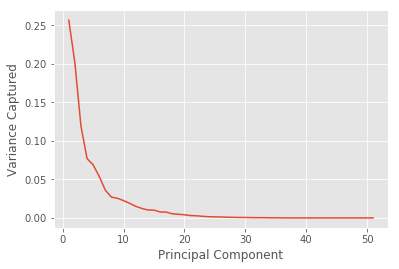

In [10]:
x_axis = np.arange(1, 52, 1)
plt.xlabel('Principal Component')
plt.ylabel('Variance Captured')
plt.plot(x_axis, pca.explained_variance_ratio_)

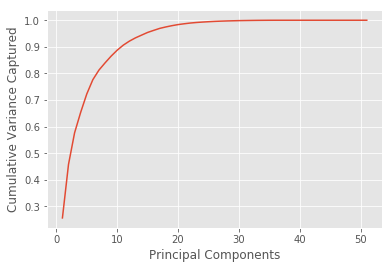

In [11]:
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Captured')
plt.plot(x_axis, pca.explained_variance_ratio_.cumsum())

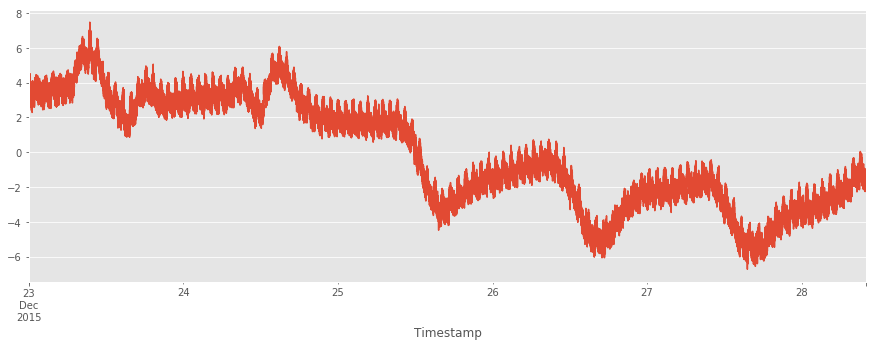

In [12]:
normal_csv = normal_csv.assign(PC1=pca_model[:,0])
normal_csv['PC1'].plot(figsize=(15,5))

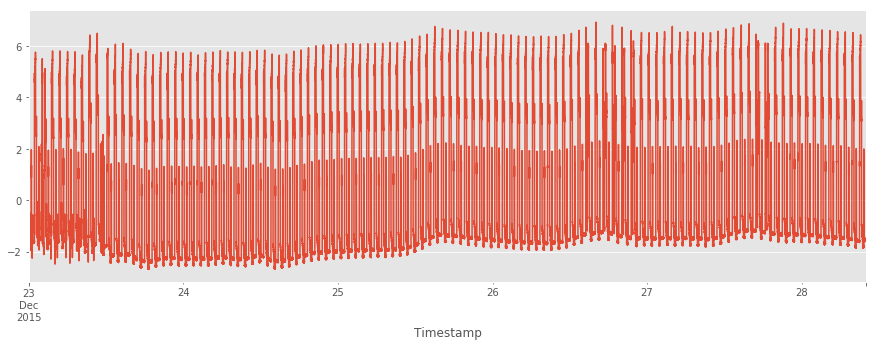

In [13]:
normal_csv = normal_csv.assign(PC2=pca_model[:,1])
normal_csv['PC2'].plot(figsize=(15,5))

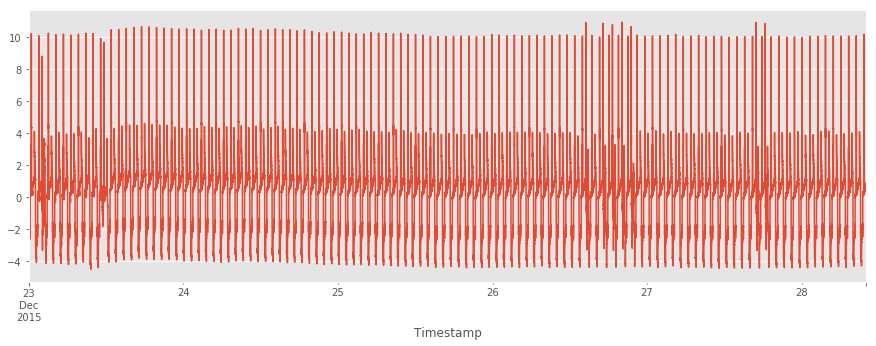

In [14]:
normal_csv = normal_csv.assign(PC3=pca_model[:,2])
normal_csv['PC3'].plot(figsize=(15,5))

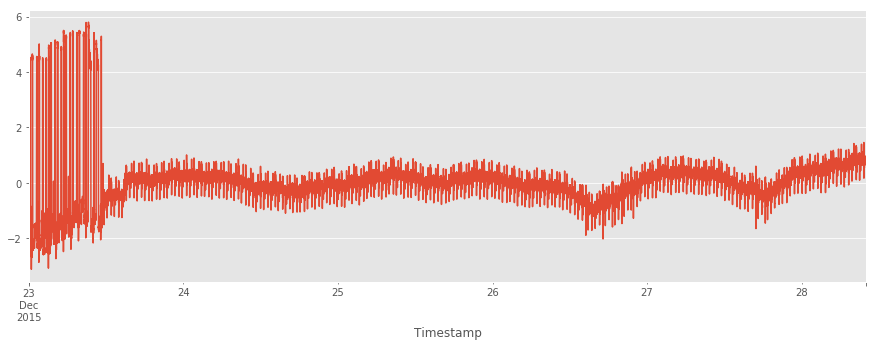

In [15]:
normal_csv = normal_csv.assign(PC11=pca_model[:,10])
normal_csv['PC11'].plot(figsize=(15,5))

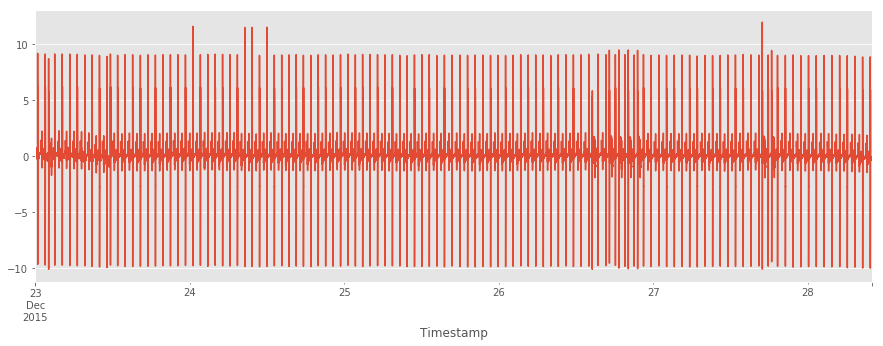

In [16]:
normal_csv = normal_csv.assign(PC12=pca_model[:,11])
normal_csv['PC12'].plot(figsize=(15,5))

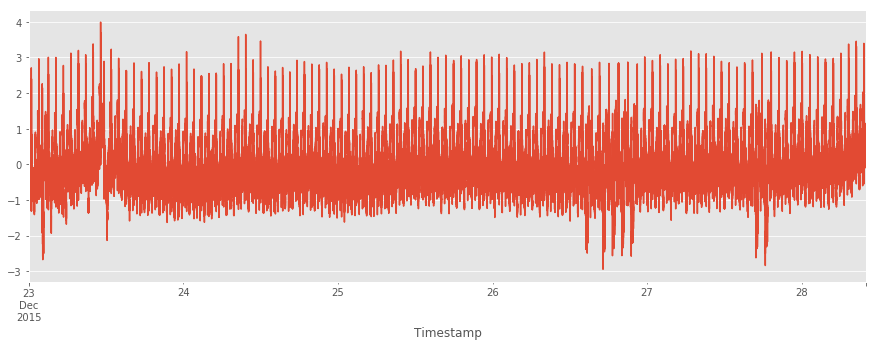

In [17]:
normal_csv = normal_csv.assign(PC13=pca_model[:,12])
normal_csv['PC13'].plot(figsize=(15,5))

Top 11 components are able to explain 90% of the variance in the data and are chosen to model the Normal Subspace. 
The next 9 components are chosen to model the Anomalous subspace.